In [171]:
# AutoML Module
from tpot import TPOTClassifier

# Normal Modules
import numpy as np
import pandas as pd
import seaborn  as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier,RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold


In [132]:
import pandas as pd
# load dataset
url = 'survey.csv'
mental = pd.read_csv(url)
# split into input and output elements
mental.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [133]:
mental.shape

(1259, 27)

In [134]:
mental.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,Age
count,1259.000000
mean,79428148.311358
std,2818299442.981968
min,-1726.000000
25%,27.000000
50%,31.000000
75%,36.000000
max,99999999999.000000


In [135]:
mental.nunique(axis = 0)

Timestamp                    1246
Age                            53
Gender                         49
Country                        48
state                          45
self_employed                   2
family_history                  2
treatment                       2
work_interfere                  4
no_employees                    6
remote_work                     2
tech_company                    2
benefits                        3
care_options                    3
wellness_program                3
seek_help                       3
anonymity                       3
leave                           5
mental_health_consequence       3
phys_health_consequence         3
coworkers                       3
supervisor                      3
mental_health_interview         3
phys_health_interview           3
mental_vs_physical              3
obs_consequence                 2
comments                      160
dtype: int64

In [136]:
mental.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [137]:
mental.Gender.unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [138]:
# Reclassify Gender Column

def clean_gender(row):
    male = ['M', 'Male', 'male', 'm', 'Male-ish', 'maile', 'something kinda male?', 'Cis Male', 'Mal', 'Male (CIS)',\
           'Make', 'Guy (-ish) ^_^', 'male leaning androgynous', 'Male ', 'Man',
        'msle', 'Mail', 'cis male', 'Malr',  'Cis Man', 'ostensibly male, unsure what that really means']
    female = ['Female', 'female',
       'Trans-female', 'Cis Female', 'F',
        'Woman', 'f', 'queer/she/they',
        'Femake', 'woman', 'Female ',
       'cis-female/femme', 'Trans woman', 'Female (trans)',
       'Female (cis)', 'femail']
    
    other = [
       'non-binary', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Androgyne', 'Agender',
       'Neuter', 'queer', 'A little about you', 'p']
    
    if row.Gender in male:
        return 'male'
    elif row.Gender in female:
        return 'female'
    else:
        return 'other'
    
def clean_df(playlist):
    df_cleaned = mental.copy()
    df_cleaned['Gender'] = df_cleaned.apply(lambda row:clean_gender(row), axis = 1)
    return df_cleaned

df_cleaned = clean_df(mental)

df_cleaned.Gender.unique()

array(['female', 'male', 'other'], dtype=object)

In [139]:
# Remove Redundant Columns
mental = df_cleaned.copy().drop(['Timestamp', 'comments'], axis = 1)

In [140]:
# remove column with large null values

NA_vall = mental.isnull().sum()

def na_filter(na, threshold = 0.4):
    col_pass = []
    for i in na.keys():
        if na[i]/mental.shape[0] < threshold:
            col_pass.append(i)
    return col_pass
mental = mental[na_filter(NA_vall)]
mental.columns

Index(['Age', 'Gender', 'Country', 'self_employed', 'family_history',
       'treatment', 'work_interfere', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

In [141]:
mental.Age.unique()

array([         37,          44,          32,          31,          33,
                35,          39,          42,          23,          29,
                36,          27,          46,          41,          34,
                30,          40,          38,          50,          24,
                18,          28,          26,          22,          19,
                25,          45,          21,         -29,          43,
                56,          60,          54,         329,          55,
       99999999999,          48,          20,          57,          58,
                47,          62,          51,          65,          49,
             -1726,           5,          53,          61,           8,
                11,          -1,          72], dtype=int64)

In [142]:
# remove outliers
mental = mental[mental.Age.between(8, 80)]

In [143]:
# Remove rows with null values

mental = mental.dropna(axis = 0)
mental.shape

(973, 24)

In [144]:
mental.isnull().sum()

Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

In [145]:
mental.to_csv('mental.csv')

In [146]:
mental = pd.read_csv('mental.csv', index_col = 0)

In [147]:
for i in mental.columns:
    print(mental[i].dtypes)

int64
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object


In [148]:
for i in mental.columns:
    if mental[i].dtypes == 'object':
        mental[i] = mental[i].astype('category')

mental.dtypes

Age                             int64
Gender                       category
Country                      category
self_employed                category
family_history               category
treatment                    category
work_interfere               category
no_employees                 category
remote_work                  category
tech_company                 category
benefits                     category
care_options                 category
wellness_program             category
seek_help                    category
anonymity                    category
leave                        category
mental_health_consequence    category
phys_health_consequence      category
coworkers                    category
supervisor                   category
mental_health_interview      category
phys_health_interview        category
mental_vs_physical           category
obs_consequence              category
dtype: object

# Encoding Categorical Data


In [149]:
# Replace Values
replace_map = {'Gender': {'male': 1, 'female': 2, 'other': 3}}

labels = mental['Gender'].astype('category').cat.categories.tolist()
replace_map_comp = {'Gender' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

print(replace_map_comp)

{'Gender': {'female': 1, 'male': 2, 'other': 3}}


In [150]:
mental.replace(replace_map_comp, inplace=True)

mental.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
18,46,2,United States,Yes,Yes,No,Sometimes,1-5,Yes,Yes,...,Yes,Very easy,No,No,Yes,Yes,No,Yes,Yes,Yes
20,29,2,United States,No,Yes,Yes,Sometimes,100-500,No,Yes,...,No,Somewhat difficult,Maybe,No,Some of them,Some of them,No,No,No,No
21,31,2,United States,Yes,No,No,Never,1-5,Yes,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Some of them,No,Maybe,Yes,No
22,46,2,United States,No,No,Yes,Often,26-100,Yes,Yes,...,Don't know,Don't know,Maybe,No,Some of them,Yes,No,Maybe,No,No
23,41,2,United States,No,No,Yes,Never,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,Yes,Don't know,No


In [151]:
# label Encoding
mental['Country'] = mental['Country'].cat.codes
mental.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
18,46,2,38,Yes,Yes,No,Sometimes,1-5,Yes,Yes,...,Yes,Very easy,No,No,Yes,Yes,No,Yes,Yes,Yes
20,29,2,38,No,Yes,Yes,Sometimes,100-500,No,Yes,...,No,Somewhat difficult,Maybe,No,Some of them,Some of them,No,No,No,No
21,31,2,38,Yes,No,No,Never,1-5,Yes,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Some of them,No,Maybe,Yes,No
22,46,2,38,No,No,Yes,Often,26-100,Yes,Yes,...,Don't know,Don't know,Maybe,No,Some of them,Yes,No,Maybe,No,No
23,41,2,38,No,No,Yes,Never,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,Yes,Don't know,No


In [122]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
mental['self_employed'] = lb_make.fit_transform(mental['self_employed'])

mental.head() #Results in appending a new column to df

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
18,46,2,38,1,Yes,No,Sometimes,1-5,Yes,Yes,...,Yes,Very easy,No,No,Yes,Yes,No,Yes,Yes,Yes
20,29,2,38,0,Yes,Yes,Sometimes,100-500,No,Yes,...,No,Somewhat difficult,Maybe,No,Some of them,Some of them,No,No,No,No
21,31,2,38,1,No,No,Never,1-5,Yes,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Some of them,No,Maybe,Yes,No
22,46,2,38,0,No,Yes,Often,26-100,Yes,Yes,...,Don't know,Don't know,Maybe,No,Some of them,Yes,No,Maybe,No,No
23,41,2,38,0,No,Yes,Never,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,Yes,Don't know,No


In [159]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()

for i in mental.select_dtypes(include=['category']):
    mental[i] =  lb_make.fit_transform(mental[i])
mental.dtypes



,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
18,46,2,38,1,1,0,3,0,1,1,...,2,4,1,1,2,2,1,2,2,1
20,29,2,38,0,1,1,3,1,0,1,...,1,1,0,1,1,1,1,1,1,0
21,31,2,38,1,0,0,0,0,1,1,...,2,1,1,1,1,1,1,0,2,0
22,46,2,38,0,0,1,1,2,1,1,...,0,0,0,1,1,2,1,0,1,0
23,41,2,38,0,0,1,0,5,0,0,...,0,0,0,1,0,0,1,2,0,0


In [161]:
mental.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
18,46,2,38,1,1,0,3,0,1,1,...,2,4,1,1,2,2,1,2,2,1
20,29,2,38,0,1,1,3,1,0,1,...,1,1,0,1,1,1,1,1,1,0
21,31,2,38,1,0,0,0,0,1,1,...,2,1,1,1,1,1,1,0,2,0
22,46,2,38,0,0,1,1,2,1,1,...,0,0,0,1,1,2,1,0,1,0
23,41,2,38,0,0,1,0,5,0,0,...,0,0,0,1,0,0,1,2,0,0


In [163]:
# Scaling Age
scaler = MinMaxScaler()
mental['Age'] = scaler.fit_transform(mental[['Age']])
mental.head()

<IPython.core.display.Javascript object>

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
18,0.593750,2,38,1,1,0,3,0,1,1,...,2,4,1,1,2,2,1,2,2,1
20,0.328125,2,38,0,1,1,3,1,0,1,...,1,1,0,1,1,1,1,1,1,0
21,0.359375,2,38,1,0,0,0,0,1,1,...,2,1,1,1,1,1,1,0,2,0
22,0.593750,2,38,0,0,1,1,2,1,1,...,0,0,0,1,1,2,1,0,1,0
23,0.515625,2,38,0,0,1,0,5,0,0,...,0,0,0,1,0,0,1,2,0,0


In [164]:
mental.columns

Index(['Age', 'Gender', 'Country', 'self_employed', 'family_history',
       'treatment', 'work_interfere', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

# Split Data

In [167]:
# define X and y
feature_cols = ['Age', 'Gender', 'family_history', 'benefits', 'care_options', 'anonymity', 'leave', 'work_interfere']
X = mental[feature_cols]
y = mental.treatment

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, stratify = y, random_state = 1, shuffle=True)

print(X_train.shape, X_test.shape)

(875, 8) (98, 8)


### Simple Model

In [168]:
# model = LogisticRegression(fit_intercept=False, C = 120, max_iter = 500) # normaly penalty is l2 and solver is lbfgs
# c used to remove regularization from the model and increase the no of iteration to allow the solver to converge 
# but it may lead to overfitting

logreg = LogisticRegression(fit_intercept=False, max_iter = 100) 

logreg.fit(X_train, y_train)

LogisticRegression(fit_intercept=False)

### Model Evaluation

In [169]:
# accuracy
X_train_pred = logreg.predict(X_train)
train_acc = accuracy_score(X_train_pred, y_train)
train_acc

X_test_pred = logreg.predict(X_test)
test_acc = accuracy_score(X_test_pred, y_test)

train_acc, test_acc

(0.7645714285714286, 0.7448979591836735)

In [177]:
# AUC score for tpot model
from sklearn.metrics import roc_auc_score
logreg_auc_score = roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])
print('AUC score: {:.3f}'.format(logreg_auc_score))

AUC score: 0.825


In [178]:
print('trining_score:', logreg.score(X_train, y_train))
print('testing_score:', logreg.score(X_test, y_test))
print('model_coeff', logreg.coef_)
print('model_intercept', logreg.intercept_)

trining_score: 0.7645714285714286
testing_score: 0.7448979591836735
model_coeff [[-0.03260577 -0.85035356  1.05511524  0.28559146  0.18746813  0.22346475
  -0.0209672   0.63667566]]
model_intercept [0.]


In [179]:
# Print the number of errors
num_err = np.sum(y_test != logreg.predict(X_test))
print("Number of errors:", num_err)

Number of errors: 25


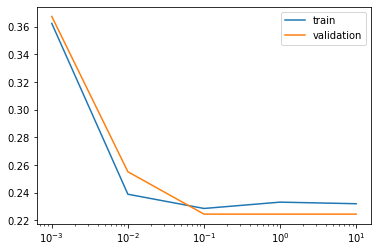

In [180]:
# Train and validaton errors initialized as empty list
train_errs = list()
valid_errs = list()
C_values = [0.001, 0.01, 0.1, 1, 10]
# Loop over values of C_value
for C_value in C_values:
    # Create LogisticRegression object and fit
    lr = LogisticRegression(C=C_value)
    lr.fit(X_train, y_train)
    
    # Evaluate error rates and append to lists
    train_errs.append( 1.0 - lr.score(X_train, y_train) )
    valid_errs.append( 1.0 - lr.score(X_test, y_test) )
    
# Plot results
plt.semilogx(C_values, train_errs, C_values, valid_errs)
plt.legend(("train", "validation"))
plt.show()

# AutoML TPOT

In [181]:
# define model evaluation
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)

In [182]:
# Define Model
model = TPOTClassifier(
    generations = 5, population_size = 50, 
    cv = cv, scoring = 'accuracy', 
    verbosity = 2, random_state = 1, 
    n_jobs = -1, disable_update_check=True,
    config_dict='TPOT light')

In [183]:
model.fit(X, y)

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.7889718774107581

Generation 2 - Current best internal CV score: 0.7889718774107581

Generation 3 - Current best internal CV score: 0.7889718774107581

Generation 4 - Current best internal CV score: 0.7889718774107581

Generation 5 - Current best internal CV score: 0.7889718774107581

Best pipeline: BernoulliNB(input_matrix, alpha=0.1, fit_prior=True)


TPOTClassifier(config_dict='TPOT light',
               cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
               disable_update_check=True, generations=5, n_jobs=-1,
               population_size=50, random_state=1, scoring='accuracy',
               verbosity=2)

In [184]:
# Print best pipeline steps
print('\nBest pipeline steps:', end='\n')
for idx, (name, transform) in enumerate(model.fitted_pipeline_.steps, start=1):
    # Print idx and transform
    print(f'{idx}. {transform}')


Best pipeline steps:
1. BernoulliNB(alpha=0.1)


In [186]:
# Save the top performing Model
model.export('Mental_health_best_model.py')

# Open this model

In [ ]:
# 
%load Mental_health_best_model.py

In [190]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB



# Average CV score on the training set was: 0.7889718774107581
exported_pipeline = BernoulliNB(alpha=0.1, fit_prior=True)
# Fix random state in exported estimator
if hasattr(exported_pipeline, 'random_state'):
    setattr(exported_pipeline, 'random_state', 1)


# New Model

In [195]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline, make_union
from tpot.export_utils import set_param_recursive
from sklearn.metrics import roc_auc_score

In [192]:
# NOTE: Make sure that the outcome column is labeled 'target' in the data file
tpot_data = pd.read_csv('mental.csv', index_col = 0)
data=tpot_data.values

In [204]:
# Average CV score on the training set was: 0.8126984126984129
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=GaussianNB()),
    KNeighborsClassifier(n_neighbors=2, p=2, weights="uniform")
)

In [205]:
# Fix random state for all the steps in exported pipeline
set_param_recursive(exported_pipeline.steps, 'random_state', 1)

In [206]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, stratify = y, random_state = 1, shuffle=True)

In [207]:
exported_pipeline.fit(X_train, y_train)
results = exported_pipeline.predict(X_test)
results

array([1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1])

In [208]:
# AUC score for tpot model
tpot_auc_score = roc_auc_score(y_test, exported_pipeline.predict_proba(X_test)[:, 1])
print('AUC score: {:.2f}'.format(tpot_auc_score))

AUC score: 0.74


In [209]:
#score for tpot model
print(exported_pipeline.score(X_train, y_train))
print(exported_pipeline.score(X_test, y_test))

0.8502857142857143
0.6938775510204082


In [210]:
# Print the number of errors
num_err = np.sum(y_test != exported_pipeline.predict(X_test))
print("Number of errors:", num_err)

Number of errors: 30


# Model Evaluation


In [211]:
# accuracy
X_train_pred = exported_pipeline.predict(X_train)
train_acc = accuracy_score(X_train_pred, y_train)
train_acc

X_test_pred = exported_pipeline.predict(X_test)
test_acc = accuracy_score(X_test_pred, y_test)

train_acc, test_acc

(0.8502857142857143, 0.6938775510204082)

# Make Predictive System

In [212]:
import random
input_data = []
for i in range(0,60):
    n = np.random.rand()
    input_data.append(n)
print(input_data)

[0.0444525543179245, 0.5104432622654499, 0.4647239070696846, 0.883607694389316, 0.8943071162726676, 0.8993086150408083, 0.12074504653856089, 0.18441337074131048, 0.24594383144050902, 0.5311906136552059, 0.4377946919216774, 0.9001786400267694, 0.7342758200475032, 0.7608988552696383, 0.8044295614422803, 0.6401372740224791, 0.8116778709318987, 0.6228110229399533, 0.6806604260413575, 0.6133131790184483, 0.40236256039871765, 0.20183222309687865, 0.03733043215271714, 0.15131759804832412, 0.5979538067408703, 0.03725386193902103, 0.1294921295582686, 0.9370674408094759, 0.8658834191329827, 0.38975894959748547, 0.0036206520925706753, 0.7751566054087402, 0.45015169415399325, 0.5421431673684909, 0.4043156499577596, 0.43248760831593, 0.2701773601150447, 0.5224400983781096, 0.0572800545914145, 0.24304543674453938, 0.15644663328750796, 0.381587149951895, 0.9158920303435097, 0.06924806531849204, 0.5074197169121211, 0.8415908175280479, 0.8544017052995172, 0.5142316973688795, 0.0712646086753238, 0.15647

In [213]:
input_data = np.array(input_data)

input_data.shape

(60,)

In [214]:
input_data = input_data.reshape(1, -1)

input_data.shape

(1, 60)

In [215]:
prediction = exported_pipeline.predict_proba(input_data)
prediction

ValueError: operands could not be broadcast together with shapes (1,60) (8,) 